<!--HEADER-->
[*Notas de aula da disciplina de Modelagem Matemática*](https://github.com/rmsrosa/modelagem_matematica) *do* [*IM-UFRJ*](https://www.im.ufrj.br).

<!--NAVIGATOR-->

<a href="https://colab.research.google.com/github//rmsrosa/modelagem_matematica/blob/livro/livro/01.04-Arquivos_dados_e_mais_graficos.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
&nbsp;
<a href="https://mybinder.org/v2/gh//rmsrosa/modelagem_matematica/livro?filepath=livro/01.04-Arquivos_dados_e_mais_graficos.ipynb"><img align="left" src="https://mybinder.org/badge.svg" alt="Open in binder" title="Open and Execute in Binder"></a>
&nbsp;

[<- 1.3. Gráficos de funções](01.03-Graficos_de_funcoes.ipynb) | [Página Inicial](00.00-Pagina_inicial.ipynb) | [Bibliografia](BA.00-Bibliografia.ipynb) | [1.5. Computação simbólica ->](01.05-Computacao_simbolica.ipynb)

---


# Arquivos, dados e mais gráficos

Neste capítulo, vamos trabalhar com alguns dados sintéticos ("artificiais") e alguns dados reais obtidos de arquivos no formato [Comma-separated values (csv)](https://en.wikipedia.org/wiki/Comma-separated_values). 

Tanto `numpy` como `pandas` podem trabalhar com *arrays* com elementos de tipos diferentes (veja [Numpy Structured arrays](https://docs.scipy.org/doc/numpy/user/basics.rec.html) e [Pandas](https://pandas.pydata.org/index.html)). No entanto, a criação, busca e modificação de *arrays* complexos estruturados com diferentes tipos de dados é mais flexível em `pandas`, como veremos abaixo no caso de dados mundiais de tuberculose. Mas para *arrays* simples, é mais fácil trabalhar com `numpy`.

Vejamos alguns exemplos.

## Importando dados

Vamos usar o arquivo `water_properties_from_Batchelor.csv` como exemplo. Ele descreve os dados de densidade e viscosidade da água pura para certos valores da temperatura, sob pressão ambiente, ao nível do mar. Vamos importá-lo de três maneiras diferentes. Uma usando a biblioteca padrão `csv`, outra usando o `numpy` e a última, o `pandas`.

No código abaixo, supomos que o arquivo `water_properties_from_Batchelor.csv` está em um subdiretório `agua` do diretório `dados`, que está na mesma raíz do diretório `notebooks`, onde se encontram essas notas. Dessa forma, o caminho relativo para o arquivo é `../dados/agua/water_properties_from_Batchelor.csv`. Esse caminho está an forma padrão do linux, unix, mac, etc. No windows, no entanto, o separador "`\`". Para criar um código independente da plataforma, o caminho é construído através do pacote `os`, mais especificamente com o método `os.path.join()`.

**Observação:** O código abaixo funciona ao rodar o caderno localmente ou na nuvem, a partir do *github*, tanto através do *Google Colab* como do *Binder*. No entanto, se você quiser rodar o código no *Google Colab*, mas a partir do seu *Google Drive*, é preciso um trabalho extra para construir o caminho correto. Faremos isso em seguida. No momento, vamos assumir que estamos em um dos casos anteriores.

In [1]:
from os import path
import csv
import numpy as np
import pandas as pd

# Usa path.join para evitar probleams com as diferenças de como os sistemas denotam subdiretórios
arquivo = path.join('..', 'dados', 'agua', 'water_properties_from_Batchelor.csv')

# Lê arquivo com o módulo csv
agua1 = list(csv.reader(open(arquivo, "r"), delimiter=","))

# Despreza as primeiras duas linhas que contém texto e converte os dados para numpy float
agua2 = np.array(agua1[2:]).astype("float")

# Lê direto como ndarray usando funções do numpy 
# Pula as duas primeiras linhas que contém texto para poder ler os números como float
agua3 = np.loadtxt(open(arquivo, "rb"), delimiter=",", skiprows=2)

# Lê usando pandas
agua4 = pd.read_csv(arquivo, header=[0,1])

print('Atributos da água pura como lista via módulo csv:\n', agua1)
print('\nAtributos da água pura como ndarray a partir da lista:\n', agua2)
print('\nAtributos da água pura como ndarray direto via numpy:\n', agua3)
print('\nAtributos da água pura via pandas:\n', agua4)

Atributos da água pura como lista via módulo csv:
 [['temp', ' density', ' viscosity'], ['Temperature (C)', ' Density (g/cm^3)', ' Viscosity (cm^2/s)'], ['0', '0.9999', '0.01787'], ['5', '1', '1.514'], ['10', '0.9997', '1.304'], ['15', '0.9991', '1.138'], ['20', '0.9982', '1.004'], ['25', '0.9971', '0.894'], ['30', '0.9957', '0.802'], ['35', '0.9941', '0.725'], ['40', '0.9923', '0.659'], ['50', '0.9881', '0.554'], ['60', '0.9832', '0.475'], ['70', '0.9778', '0.414'], ['80', '0.9718', '0.366'], ['90', '0.9653', '0.327'], ['100', '0.9584', '0.295']]

Atributos da água pura como ndarray a partir da lista:
 [[0.000e+00 9.999e-01 1.787e-02]
 [5.000e+00 1.000e+00 1.514e+00]
 [1.000e+01 9.997e-01 1.304e+00]
 [1.500e+01 9.991e-01 1.138e+00]
 [2.000e+01 9.982e-01 1.004e+00]
 [2.500e+01 9.971e-01 8.940e-01]
 [3.000e+01 9.957e-01 8.020e-01]
 [3.500e+01 9.941e-01 7.250e-01]
 [4.000e+01 9.923e-01 6.590e-01]
 [5.000e+01 9.881e-01 5.540e-01]
 [6.000e+01 9.832e-01 4.750e-01]
 [7.000e+01 9.778e-01 4.14

## Importando dados do Google Drive no Google Colab

O [Google Colab](https://colab.research.google.com/notebooks/welcome.ipynb) é um ambiente computacional em nuvem muito rico. Em versão paga, disponibiliza capacidades computacionais bastante poderosas. Em problemas que demandam muito poder computacional, ela é uma ótima alternativa a supercomputadores locais. E mesmo na versão não paga, o ambiente roda em *clusters* bastante rápidos e com um leque bem completo e atualizado de pacotes.

Uma vantagem que ele tem em relação ao [binder](https://mybinder.org) é que, além de poder executar os cadernos Jupyter que estão em um repositório do *github*, ele também pode executar cadernos armazenados no *Google Drive*. Mesmo em problemas que não demandam muito poder computacional, o *Google Colab* é uma solução para quem não tem o jupyter lab/notebook instalado em sua máquina, ou não tem os pacotes necessários.

O único problema é que o acesso aos arquivos não é tão imediato. Primeiro, é necessário montarmos o "disco" do *Google Drive* dentro do *Google Colab*.  Isso é feito da seguinte forma:
```python
from google.colab import drive
drive.mount('/content/gdrive')
```
Na primeira vez (de cada sessão) que o código acima é executado, será requisitado que uma determinada página seja aberta, em outra aba, para habilitar o *Google Drive File Stream* a acessar a sua conta no Google e, assim, verificar se você tem permissão para acessar aquele diretório do Google Drive que contém as notas. Após a sua permissão, ele irá exibir uma senha que deverá copiada e preenchida no diálogo aberto logo após a execução da célula de código, de volta na aba original. Uma vez feito isso, a execução da célula será concluída e os outros blocos poderão ser executados.

Em seguida, para facilitar o acesso aos arquivos, é útil definir um variável com o caminho para o diretório com os cadernos. Se a estrutura do repositório for mantida dentro do diretório "Colab Notebook" do seu "Google Drive", o caminho é

```python
nbpath="/content/gdrive/My Drive/Colab Notebooks/modelagem_matematica/notebooks"
```

Caso use outros nomes e outra estrutura de subdiretórios, este endereço deverá ser devidamente atualizado. Mas uma vez com essa variável `nbpath` definida, podemos acessar os arquivos apenas acrescentando essa variável no início do caminho. No caso dos dados da água pura mencionados acima, teríamos
```python
arquivo = path.join(nbpath, '..', 'dados', 'agua', 'water_properties_from_Batchelor.csv')
```

Veja mais informações em [3 Ways to Load CSV files into Colab](https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92) [Interacting with custom libraries in Google Colaboratory](https://zerowithdot.com/colab-workspace/).

Mais uma vez, caso use, localmente, o *jupyter lab* ou o *jupyter notebook* não é necessária nenhuma alteração, apenas que mantenha a estrutura de subdiretórios do repositório `modelagem_matematica`, independente de onde ele esteja na sua máquina e mesmo de como este mesmo diretório seja (re)nomeado.

## Visualização

Visualizando os dados da densidade em função da temperatura.

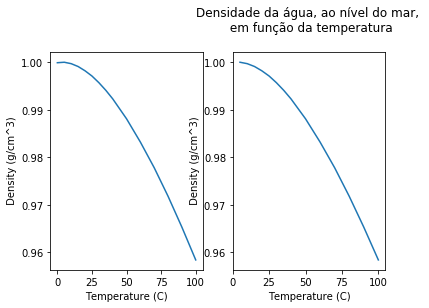

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

# Cria o objeto onde a figura será gerada
fig = plt.figure()

# Cria dois espaços para subplots. 
# O argumento 'nmk' significa uma divisão n x m com o subplot na posição k
subplt1 = fig.add_subplot(121)
subplt2 = fig.add_subplot(122)

# Gera o gráfico do primeiro subplot
subplt1.plot(agua3[:,0], agua3[:,1])
subplt1.set(xlabel=agua1[1][0], ylabel=agua1[1][1])

# Gera o gráfico do segundo subplot
subplt2.plot(agua4.iloc[1:,0], agua4.iloc[1:,1])
subplt2.set(xlabel=agua1[1][0], ylabel=agua1[1][1])

# Título geral da figura
plt.title('Densidade da água, ao nível do mar, \n em função da temperatura\n')

# Exibe a figura
plt.show()

Ao usarmos o `pandas`, também temos a opção de usar o método `plot` do próprio objeto criado pelo `pandas`:

<Figure size 432x288 with 0 Axes>

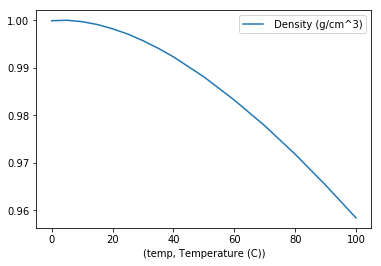

In [3]:
# Cria o objeto onde a figura será gerada
fig = plt.figure()

# Gera o gráfico
agua4.plot(x=0, y=1)

# Altera legenda
plt.legend([agua1[1][1]])

# Exibe a figura
plt.show()

A legenda é incluida automaticamente pelo `plot` do pandas, no momento do comando `agua4.plot(x=0, y=1)`. Verifique isso comentando a linha `plt.legend([agua1[1][1]])` que altera a legenda. Observe, nesse momento, que como a tabela está indexada pelas duas primeiras linhas, a legenda que aparece não é muito apropriada. Por isso alteramos a legenda acima. Abaixo, vemos exemplos onde isso não é necessário.

Mas antes da passarmos para os dados de tuberculose, vamos visualizar, em um mesmo gráfico, as propriedades de densidade e viscosidade da água. Como são atributos de dimensões físicas diferentes ("massa / volume" e "área / tempo", respectivamente), vamos colocar as unidades em lados diferentes da figura. Vejamos como isso pode ser feito. (Veja também [Plots with different scales](https://matplotlib.org/gallery/api/two_scales.html).)

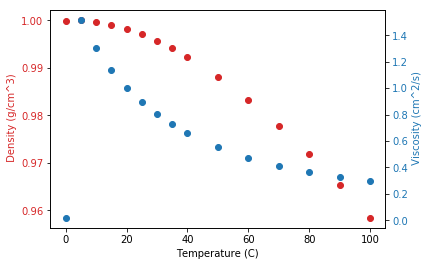

In [4]:
# Cria o objeto onde a figura será gerada
fig, ax1 = plt.subplots()

# Gera o primeira gráfico
color = 'tab:red' # define cor para distinguir os dois gráficos
ax1.set_xlabel(agua1[1][0]) # Define a legenda do eixo horizontal
ax1.set_ylabel( agua1[1][1], color=color) # Define a legenda e a cor do eixo à direita
ax1.plot(agua3[:,0], agua3[:,1], 'o', color=color) # Traça o primeiro gráfico, com a cor desejada
ax1.tick_params(axis='y', labelcolor=color) # "ticks" do eixo com a mesma cor do gráfico

# `twinx` inicia um segundo par de eixos com o eixo x comum ao anterior
ax2 = ax1.twinx()  

# Gera o segundo gráfico
color = 'tab:blue'
# Label do eixo x é comum ao gráfico de cima
ax2.set_ylabel(agua1[1][2], color=color)  # Define a legenda e a cor do eixo à direita
ax2.plot(agua3[:,0], agua3[:,2], 'o', color=color) # Traça o segundo gráfico, com a cor desejada
ax2.tick_params(axis='y', labelcolor=color) # "ticks" do eixo com a mesma cor do gráfico

# Caso o label do eixo direito seja cortado, descomente a linha a seguir
# fig.tight_layout()

# Exibe a figura
plt.show()

### Dados mundiais de tuberculose

Primeiro, importamos dados de tuberculose, entre 2000 e 2015, de diversos países, disponível na página http://www.who.int/tb/country/data/download/en/. Esses dados foram copiados localmente, caso o acesso à internet não esteja disponível, mas primeiramente tentamos acessa na rede. Usamos `try/except` para considerar os dois casos.

In [5]:
import pandas

try:
    # lê o arquivo .cvs de uma página web
    df = pandas.read_csv('https://extranet.who.int/tme/generateCSV.asp?ds=estimates', sep=',')
    print('Arquivo lido da internet')
except:
    try:
        # se o arquivo não estiver disponível online, usa o arquivo local
        arquivo = path.join('..', 'dados', 'TB','TB_burden_countries_2017-03-13.csv')
        df = pandas.read_csv(arquivo, sep=',')
        print('Arquivo lido localmente')
    except:
        print('Arquivo não disponível')

Arquivo lido da internet


As primeiras dez linhas da tabela podem ser visualizada a seguir, com o método `head()`.

In [6]:
df.head(10)

,country,iso2,iso3,iso_numeric,g_whoregion,year,e_pop_num,e_inc_100k,e_inc_100k_lo,e_inc_100k_hi,...,e_mort_num,e_mort_num_lo,e_mort_num_hi,cfr,cfr_lo,cfr_hi,c_newinc_100k,c_cdr,c_cdr_lo,c_cdr_hi
0,Afghanistan,AF,AFG,4,EMR,2000,20093756,190.0,123.0,271.0,...,14000,7800,21000,NaN,NaN,NaN,35.0,19.0,13.0,29.0
1,Afghanistan,AF,AFG,4,EMR,2001,20966463,189.0,123.0,271.0,...,13000,7500,20000,NaN,NaN,NaN,48.0,26.0,18.0,39.0
2,Afghanistan,AF,AFG,4,EMR,2002,21979923,189.0,122.0,270.0,...,12000,7200,19000,NaN,NaN,NaN,63.0,33.0,23.0,51.0
3,Afghanistan,AF,AFG,4,EMR,2003,23064851,189.0,122.0,270.0,...,13000,7700,20000,NaN,NaN,NaN,60.0,32.0,22.0,49.0
4,Afghanistan,AF,AFG,4,EMR,2004,24118979,189.0,122.0,270.0,...,12000,7200,19000,NaN,NaN,NaN,76.0,40.0,28.0,62.0
5,Afghanistan,AF,AFG,4,EMR,2005,25070798,189.0,122.0,270.0,...,12000,6900,18000,NaN,NaN,NaN,87.0,46.0,32.0,71.0
6,Afghanistan,AF,AFG,4,EMR,2006,25893450,189.0,122.0,270.0,...,11000,6400,16000,NaN,NaN,NaN,98.0,52.0,36.0,80.0
7,Afghanistan,AF,AFG,4,EMR,2007,26616792,189.0,122.0,270.0,...,10000,6000,15000,NaN,NaN,NaN,108.0,57.0,40.0,88.0
8,Afghanistan,AF,AFG,4,EMR,2008,27294031,189.0,122.0,270.0,...,11000,6500,17000,NaN,NaN,NaN,104.0,55.0,38.0,85.0
9,Afghanistan,AF,AFG,4,EMR,2009,28004331,189.0,123.0,270.0,...,12000,7300,19000,NaN,NaN,NaN,93.0,49.0,35.0,76.0


Enquanto que as últimas cindo linhas são

In [7]:
df.tail(5)

,country,iso2,iso3,iso_numeric,g_whoregion,year,e_pop_num,e_inc_100k,e_inc_100k_lo,e_inc_100k_hi,...,e_mort_num,e_mort_num_lo,e_mort_num_hi,cfr,cfr_lo,cfr_hi,c_newinc_100k,c_cdr,c_cdr_lo,c_cdr_hi
3845,Zimbabwe,ZW,ZWE,716,AFR,2013,15054506,304.0,228.0,391.0,...,11000,8000,14000,NaN,NaN,NaN,219.0,72.0,56.0,96.0
3846,Zimbabwe,ZW,ZWE,716,AFR,2014,15411675,278.0,202.0,366.0,...,11000,7800,14000,NaN,NaN,NaN,192.0,69.0,53.0,95.0
3847,Zimbabwe,ZW,ZWE,716,AFR,2015,15777451,242.0,179.0,314.0,...,9000,6800,11000,NaN,NaN,NaN,171.0,71.0,55.0,96.0
3848,Zimbabwe,ZW,ZWE,716,AFR,2016,16150362,233.0,173.0,302.0,...,8700,6500,11000,NaN,NaN,NaN,165.0,71.0,55.0,96.0
3849,Zimbabwe,ZW,ZWE,716,AFR,2017,16529904,221.0,164.0,287.0,...,8300,6300,11000,0.23,0.15,0.32,156.0,71.0,55.0,96.0


O número de linhas e de colunas é 

In [8]:
df.shape

(3850, 47)

o signifcado de cada coluna pode ser obtido em outro arquivo .csv, importado a seguir

In [9]:
# carrega o dicionário
try:
    df_dictionary = pandas.read_csv('https://extranet.who.int/tme/generateCSV.asp?ds=dictionary',',')
    print('Arquivo lido da internet')
except: 
    # se o arquivo não estiver disponível online, usa o arquivo local
    try:
        arquivo = path.join('..','dados', 'TB', 'TB_data_dictionary_2017-03-13.csv')
        df_dictionary = pandas.read_csv(arquivo, sep=',')
        print('Arquivo lido localmente')
    except:
        print('Arquivo não encontrado')
    

Arquivo lido da internet


Abaixo o conteúdo da primeira linha do dicionário:

In [10]:
df_dictionary.iloc[0]

variable_name                                      budget_cpp_dstb
dataset                                                     Budget
code_list                                                      NaN
definition       Average cost of drugs budgeted per patient for...
Name: 0, dtype: object

Agora uma tabela com as primeiras cinco linhas do dicionário.

In [11]:
df_dictionary.head(1)

,variable_name,dataset,code_list,definition
0,budget_cpp_dstb,Budget,NaN,Average cost of drugs budgeted per patient for...


Podemos listar apenas a coluna de definições, através do nome da coluna descrito na linha inicial:

In [12]:
df_dictionary['definition']

0      Average cost of drugs budgeted per patient for...
1      Average cost of drugs budgeted per patient for...
2      Average cost of drugs budgeted per patient for...
3      Budget required for drugs to treat drug-suscep...
4      Budget required for laboratory infrastructure,...
5      Budget required for programme costs to treat d...
6      Budget required for operational research and s...
7      Budget required for all other budget line item...
8       Budget required for patient support (US Dollars)
9      Budget required for programme costs to treat d...
10     Budget required for drugs to treat drug-resist...
11     Budget required for National TB Programme staf...
12     Budget required for collaborative TB/HIV activ...
13                    Total budget required (US Dollars)
14     Expected funding for drugs to treat drug-susce...
15     Expected funding for laboratory infrastructure...
16     Expected funding for programme costs to treat ...
17     Expected funding for ope

Para vermos todo o conteúdo de uma certa definição:

In [13]:
df_dictionary.iat[6,3]

'Budget required for operational research and surveys (US Dollars)'

Ou

In [14]:
df_dictionary["definition"][6]

'Budget required for operational research and surveys (US Dollars)'

In [15]:
df_dictionary[df_dictionary["variable_name"] == 'e_pop_num']["definition"]

112    Estimated total population number
Name: definition, dtype: object

In [16]:
df_dictionary[df_dictionary["variable_name"] == 'e_inc_100k']["definition"]

76    Estimated incidence (all forms) per 100 000 po...
Name: definition, dtype: object

Vamos ver agora só um pedaço da base de dados, de determinados países. 

Selecionamos as colunas 0, 5, 6 e 7, que se referem ao "país", ao "ano", à "população" e a uma variável denotada `e_inc_100k`, que, pelo nome, deve indicar o número de incidências por 100 mil habitantes. 

Podemos verificar isso selecionando a linha que contem 'e_pop_num' ou 'e_inc_100k' como `variable_name`. O resultado obtida é um objeto `pandas` do tipo `Series`. Nesse caso, para ter uma leitura limpa do seu conteúdo, obtemos uma lista com os seus valores. Como só há um valor na lista e é o único que nos interessa, selecionamos o valor na posição 0. Vejamos.

In [17]:
print("tipo do objeto:", 
      type(df_dictionary[df_dictionary.variable_name == 'e_pop_num']["definition"]))
print("definição de 'e_pop_num':", 
      df_dictionary[df_dictionary.variable_name == 'e_pop_num']["definition"].values[0])
print("definição de 'e_inc_100k':", 
      df_dictionary[df_dictionary.variable_name == 'e_inc_100k']["definition"].values[0])

tipo do objeto: <class 'pandas.core.series.Series'>
definição de 'e_pop_num': Estimated total population number
definição de 'e_inc_100k': Estimated incidence (all forms) per 100 000 population


Agora, selecionamos esses dados para alguns países:

In [18]:
df_short = df[df.iso2.isin(['AR','BR','CO','PE','US'])].iloc[:,[0,5,6,7]]
print(df_short)

                       country  year  e_pop_num  e_inc_100k
144                  Argentina  2000   37057452        37.0
145                  Argentina  2001   37471509        35.0
146                  Argentina  2002   37889370        35.0
147                  Argentina  2003   38309379        33.0
148                  Argentina  2004   38728696        34.0
149                  Argentina  2005   39145488        31.0
150                  Argentina  2006   39558890        28.0
151                  Argentina  2007   39970224        29.0
152                  Argentina  2008   40382389        26.0
153                  Argentina  2009   40799407        22.0
154                  Argentina  2010   41223889        20.0
155                  Argentina  2011   41656879        27.0
156                  Argentina  2012   42096739        24.0
157                  Argentina  2013   42539925        24.0
158                  Argentina  2014   42981515        25.0
159                  Argentina  2015   4

Podemos visualizar os dados do Brasil:

<Figure size 432x288 with 0 Axes>

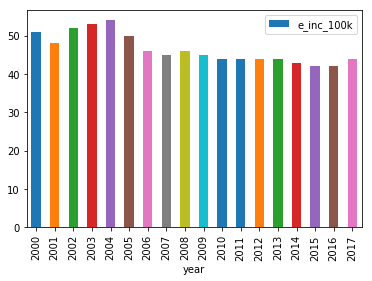

In [19]:
plt.figure()
df_brazil_e_inc_100k = df[df.iso2=='BR'].iloc[:,[5,7]]
df_brazil_e_inc_100k.plot.bar(x=0, y=1)
plt.show()

E também podemos visualizar os dados comparativos dos países selecionados. Primeiramente, usamos o método `pivot` para alterar o formato da tabela (veja [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html)):

In [20]:
df_short_pivoted = df_short.pivot(index='year', columns='country', values='e_inc_100k')
df_short_pivoted

country,Argentina,Brazil,Colombia,Peru,United States of America
year,,,,,
2000,37.0,51.0,36.0,186.0,6.7
2001,35.0,48.0,35.0,177.0,6.4
2002,35.0,52.0,34.0,170.0,6.0
2003,33.0,53.0,35.0,149.0,5.9
2004,34.0,54.0,33.0,153.0,5.7
2005,31.0,50.0,30.0,153.0,5.5
2006,28.0,46.0,32.0,153.0,5.3
2007,29.0,45.0,31.0,143.0,5.1
2008,26.0,46.0,32.0,140.0,4.9


<Figure size 432x288 with 0 Axes>

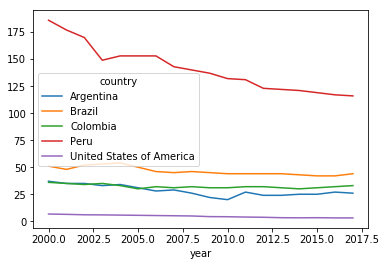

In [21]:
plt.figure()
df_short_pivoted.plot()
plt.show()

### Dados do índice Bovespa

Outra série interessante disponível *online* é a do índice bovespa: [BM&F Bovespa: Cotações históricas](http://www.bmfbovespa.com.br/pt_br/servicos/market-data/historico/mercado-a-vista/cotacoes-historicas/). Explore!

## Exercícios

1. Com os dados do arquivo `water_properties_from_Batchelor.csv`, trace o gráfico da viscosidade em função da densidade.

1. Leia o arquivo `dados/bola_quicante/bola_quicante_tempos.cvs`, que contém o instante dos primeiros quiques de uma bola, e trace esses instantes em função do quique.

1. Leia a [tabela de ocorrências aeronáuticas](http://dados.gov.br/dataset/ocorrencias-aeronauticas-da-aviacao-civil-brasileira/resource/9d8a7e09-5f75-47b3-891b-b5f1bab26d59?inner_span=True) disponível na página do [Portal Brasileiro de Dados Abertos](http://dados.gov.br). Em seguida,
    1. extraia a lista dos tipos de ocorrências; e 
    1. monte um gráfico ilustrando a incidência por tipo de aeronave de um dos tipos de ocorrência a sua escolha.


<!--NAVIGATOR-->

---
[<- 1.3. Gráficos de funções](01.03-Graficos_de_funcoes.ipynb) | [Página Inicial](00.00-Pagina_inicial.ipynb) | [Bibliografia](BA.00-Bibliografia.ipynb) | [1.5. Computação simbólica ->](01.05-Computacao_simbolica.ipynb)

<a href="https://colab.research.google.com/github//rmsrosa/modelagem_matematica/blob/livro/livro/01.04-Arquivos_dados_e_mais_graficos.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

<a href="https://mybinder.org/v2/gh//rmsrosa/modelagem_matematica/livro?filepath=livro/01.04-Arquivos_dados_e_mais_graficos.ipynb"><img align="left" src="https://mybinder.org/badge.svg" alt="Open in binder" title="Open and Execute in Binder"></a>
&nbsp;